# Recommendation System
- Recommendation system is an AI algorithm, usually associated with machine learning used to suggest or recommend additional products to consumers. They provide personalized suggestions for the items that are most relevant to the user. Examples - Amazon recommending products to consumers and suggesting bundling options. Netflix providing movie recommendations to viewers. 

- Recommender systems are trained to understand the preferences, previous decisions, and characteristics of people and products using data gathered about their interactions. These include impressions, clicks, likes, and purchases.

### Types of Recommendation Systems

#### 1. Content Filtering

Content filtering uses the attributes or features of an item to recommend other items similar to the user's preferences.

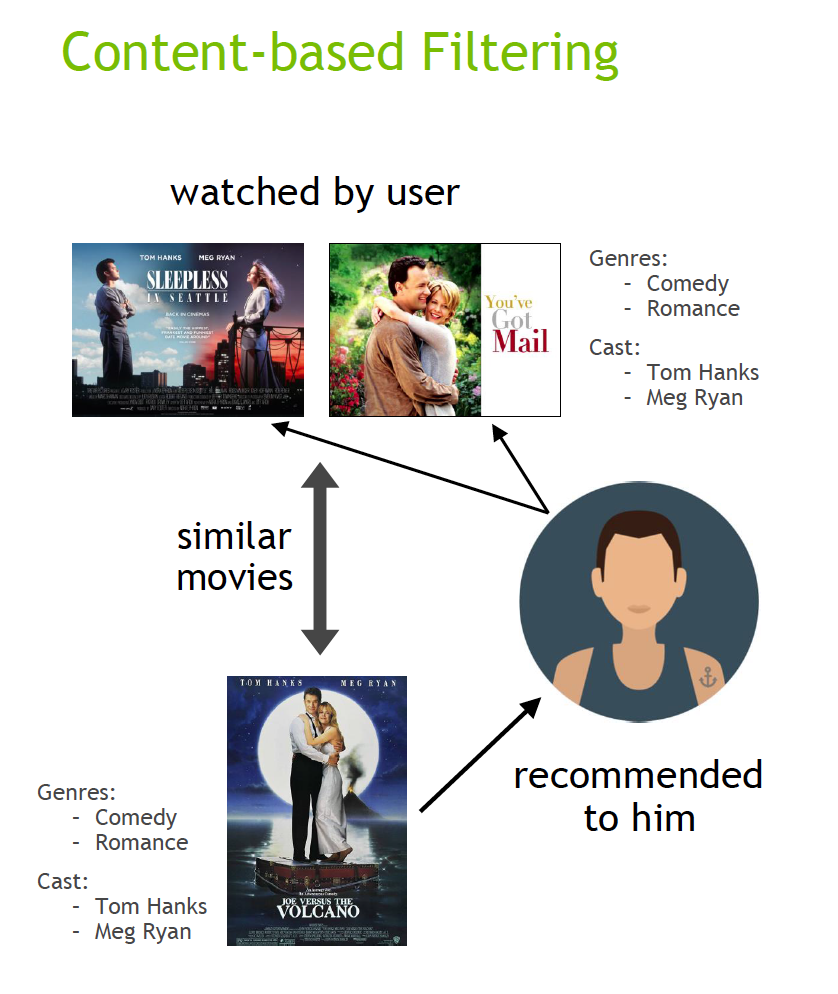

#### 2. Context Filtering
Context Filtering uses a sequence of contextual user actions plus the current context to predict the probability of the next action. In the Netflix example - given one sequence for each user - the country, device, date and time when they watched a movie - they trained a model to predict what to watch next.

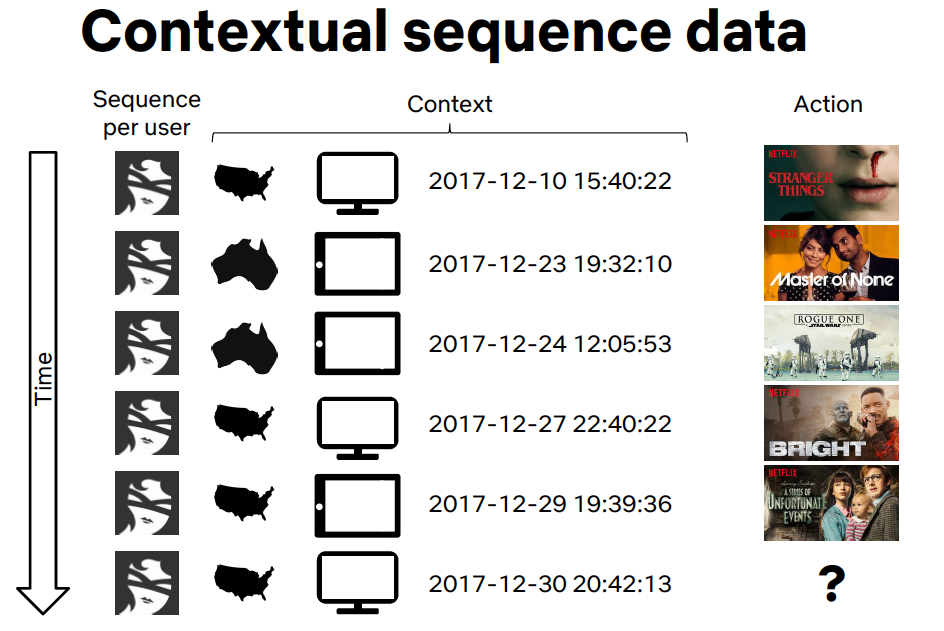

#### 3. Collaborative Filtering

Collaborative filtering algorithms recommend items (this is the filtering part) based on preference information from many users (this is the collaborative part). This approach uses similarity of user preference behavior,  given previous interactions between users and items, recommender algorithms learn to predict future interaction. These recommender systems build a model from a user’s past behavior, such as items purchased previously or ratings given to those items and similar decisions by other users. The idea is that if some people have made similar decisions and purchases in the past, like a movie choice, then there is a high probability they will agree on additional future selections. For example, if a collaborative filtering recommender knows you and another user share similar tastes in movies, it might recommend a movie to you that it knows this other user already likes.

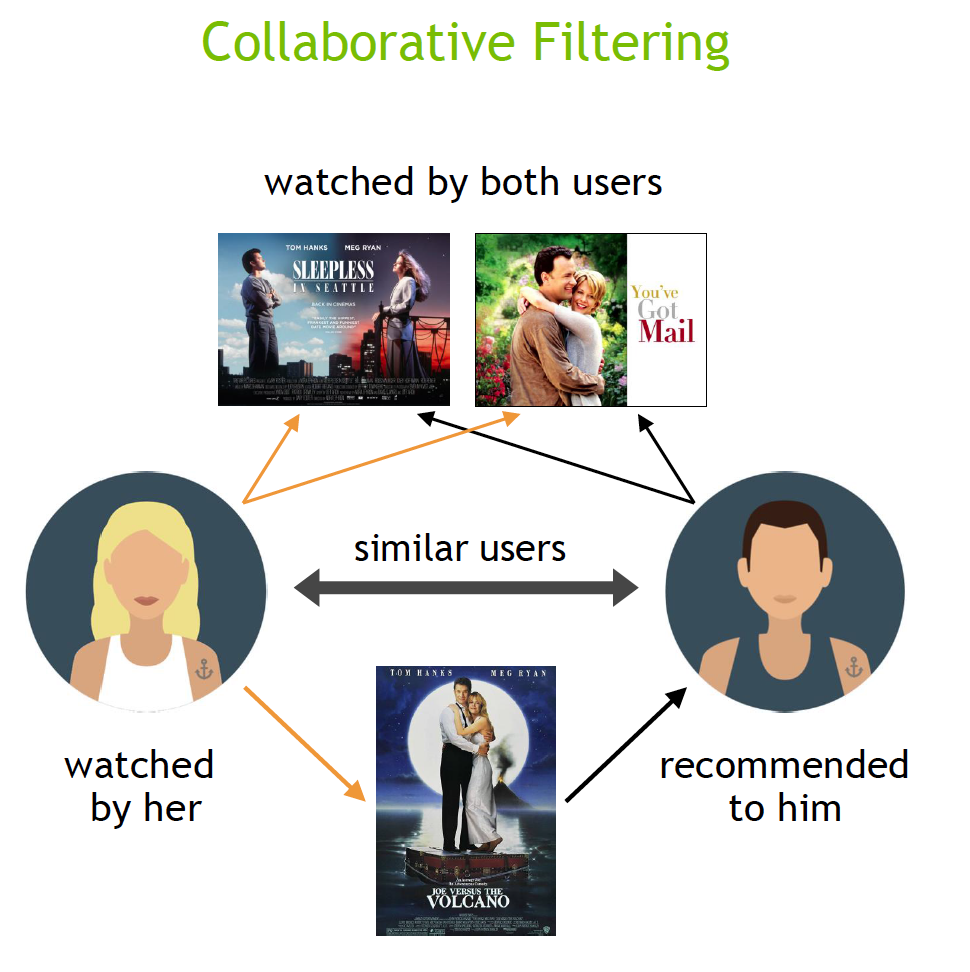

### Collaborative Filtering Example - Book Rental

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Read the books dataset

In [5]:
df_books = pd.read_csv('/Users/macuser/Documents/PGP AI & ML/Machine Learning/CEP 2_Book Recommendation/BX-Books.csv', encoding = 'latin-1')

In [6]:
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


#### Read all other datasets

In [26]:
df_users = pd.read_csv('/Users/macuser/Documents/PGP AI & ML/Machine Learning/CEP 2_Book Recommendation/BX-Users.csv', encoding = 'latin-1')

In [27]:
df_users.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [61]:
df_users.isnull().sum()

user_id          0
Location         1
Age         110763
dtype: int64

In [62]:
df_users.dropna(inplace = True)

In [63]:
df_users.shape

(168096, 3)

In [30]:
df_ratings = pd.read_csv('/Users/macuser/Documents/PGP AI & ML/Machine Learning/CEP 2_Book Recommendation/BX-Book-Ratings.csv', encoding = 'latin-1', nrows = 10000)

In [31]:
df_ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


#### Merge the datasets

In [64]:
df = pd.merge(df_ratings, df_books, on = 'isbn')

In [65]:
df.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press


In [66]:
n_users = df.user_id.nunique()
n_books = df.isbn.nunique()

print('Number of Users: ' +str(n_users))
print('Number of Books: ' +str(n_books))

Number of Users: 828
Number of Books: 8051


#### Convert ISBN value into numeric number

In [67]:
isbn_list = df.isbn.unique()
print("Lenght of ISBN list: ", len(isbn_list))

Lenght of ISBN list:  8051


In [68]:
def get_isbn_numeric_id(isbn):
    itemindex = np.where(isbn_list == isbn)
    return itemindex[0][0]

In [69]:
userid_list = df.user_id.unique()

In [70]:
def get_userid_numeric_id(user_id):
    itemindex = np.where(userid_list == user_id)
    return itemindex[0][0]

#### Convert both user_id and ISBN to the ordered list, i.e. from 0..n-1

In [71]:
df['user_id_order'] = df['user_id'].apply(get_userid_numeric_id)

In [72]:
df['isbn_id'] = df['isbn'].apply(get_isbn_numeric_id)

In [73]:
df.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,user_id_order,isbn_id
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,0,0
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle,1,1
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,2,2
3,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,3,2
4,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,4,3


#### Reindexing the columns

In [74]:
new_col_order = ['user_id_order','isbn_id','rating','book_title','book_author','year_of_publication', 'publisher','ibsn','user_id']
df = df.reindex(columns = new_col_order)
df.head()

,user_id_order,isbn_id,rating,book_title,book_author,year_of_publication,publisher,ibsn,user_id
0,0,0,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN,276725
1,1,1,5,Rites of Passage,Judith Rae,2001,Heinle,NaN,276726
2,2,2,0,The Notebook,Nicholas Sparks,1996,Warner Books,NaN,276727
3,3,2,0,The Notebook,Nicholas Sparks,1996,Warner Books,NaN,278418
4,4,3,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,NaN,276729


#### Split data into train and test data

In [75]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.3)

#### Create two user_book metrix for training and testing

In [76]:
train_data_matrix = np.zeros((n_users, n_books))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

In [77]:
test_data_matrix = np.zeros((n_users, n_books))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [78]:
train_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Import Pairwise Model

In [79]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric = 'cosine')
item_similarity = pairwise_distances(train_data_matrix, metric = 'cosine')

In [80]:
user_similarity

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

#### Define a UDF to make predictions

In [81]:
#Defining custom function to make predictions
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [83]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

ValueError: shapes (828,8051) and (828,828) not aligned: 8051 (dim 1) != 828 (dim 0)

In [84]:
#Importing RMSE function 
from sklearn.metrics import mean_squared_error
from math import sqrt

#Defining custom function to filter out elements with ground_truth.nonzero
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [85]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

NameError: name 'user_prediction' is not defined